In [21]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns

In [22]:
import os
print(os.getcwd())

c:\Users\maili\ProjecteData\Equip_11\Scripts


### Cargar dataset

In [23]:
BASE_DIR = os.getcwd()

csv_path = os.path.join(BASE_DIR, '..', 'Data', 'RRHH - 26062025.csv') # -- cambiar solo la fecha del fichero 

df_RRHH = pd.read_csv(csv_path)

df_RRHH

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
1,10,13,8,2,1,361,52,3,28,205.917,...,0,1,1,1,0,4,80,172,27,40
2,15,14,11,2,4,291,31,12,40,306.345,...,0,1,1,1,0,1,73,171,25,40
3,20,13,3,6,2,260,50,11,36,343.253,...,0,1,4,1,0,0,65,168,23,40
4,17,11,3,2,2,179,22,17,40,343.253,...,0,2,2,0,1,0,63,170,22,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,34,19,12,3,4,118,10,10,37,261.306,...,0,1,0,0,0,0,83,172,28,64
1083,22,1,10,4,4,179,26,9,30,265.017,...,0,3,0,0,0,0,56,171,19,64
1084,26,19,5,6,3,300,26,13,43,237.656,...,0,1,2,1,1,1,77,175,25,64
1085,20,19,4,6,3,260,50,11,36,326.452,...,0,1,4,1,0,0,65,168,23,56


In [32]:
desempenyo = df_RRHH[['ID', 'Hit_target', 'Service_time','Work_load_Average_day','Distance_Residence_Work','Age','Son', 'Education']].drop_duplicates(subset='ID').reset_index(drop=True)
desempenyo.info()
desempenyo.head(10)
desempenyo.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       386 non-null    int64  
 1   Hit_target               386 non-null    int64  
 2   Service_time             386 non-null    int64  
 3   Work_load_Average_day    386 non-null    float64
 4   Distance_Residence_Work  386 non-null    int64  
 5   Age                      386 non-null    int64  
 6   Son                      386 non-null    int64  
 7   Education                386 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 24.3 KB


,ID,Hit_target,Service_time,Work_load_Average_day,Distance_Residence_Work,Age,Son,Education
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,193.500000,94.707254,12.194301,273.472158,29.424870,36.186528,1.023316,1.318653
std,111.572846,3.783738,4.365278,37.429177,14.626637,6.844956,1.050405,0.702141
min,1.000000,81.000000,1.000000,205.917000,5.000000,27.000000,0.000000,1.000000
25%,97.250000,93.000000,9.000000,246.074000,16.000000,30.000000,0.000000,1.000000
50%,193.500000,95.000000,13.000000,265.017000,26.000000,37.000000,1.000000,1.000000
75%,289.750000,97.000000,16.000000,294.217000,45.000000,40.000000,2.000000,1.000000
max,386.000000,100.000000,29.000000,378.884000,52.000000,58.000000,4.000000,4.000000


## Distribucion de Hit_target por Distance_Residence_Work (2 variables numericas) 

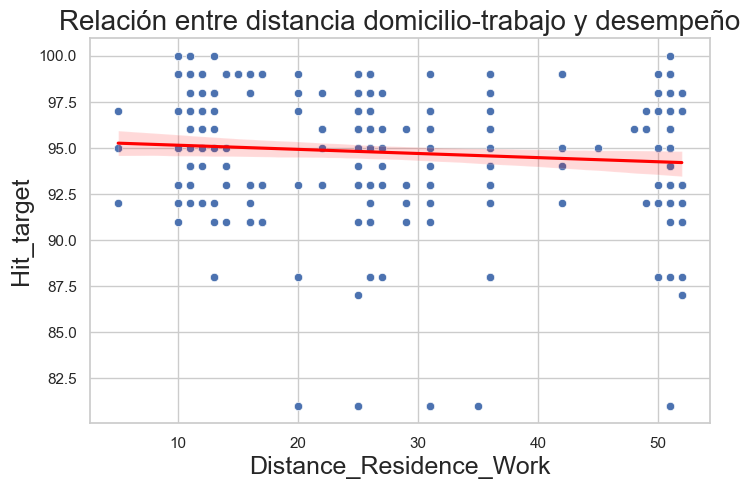

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Distance_Residence_Work', y='Hit_target', data=desempenyo)
sns.regplot(x='Distance_Residence_Work', y='Hit_target', data=desempenyo, scatter=False, color='red')
plt.title('Relación entre distancia domicilio-trabajo y desempeño', fontsize=20)
plt.xlabel('Distance_Residence_Work', fontsize=18)
plt.ylabel('Hit_target', fontsize=18)
plt.show()

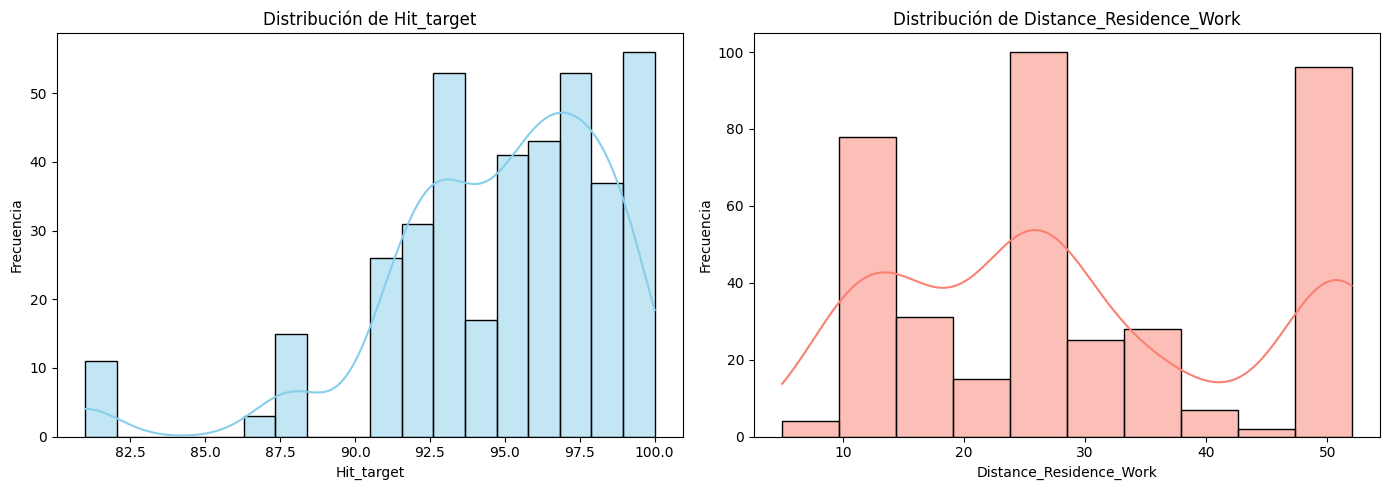

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Hit_target
sns.histplot(data=desempenyo, x='Hit_target', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de Hit_target')
axes[0].set_xlabel('Hit_target')
axes[0].set_ylabel('Frecuencia')

# Histograma de Distance_Residence_Work
sns.histplot(data=desempenyo, x='Distance_Residence_Work', kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribución de Distance_Residence_Work')
axes[1].set_xlabel('Distance_Residence_Work')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Análisis de los histogramas:

Distribución de Hit_target:
La distribución es asimétrica y presenta picos no uniformes, lo que indica que probablemente no sigue una distribución normal.

Distribución de Distance_Residence_Work:
La distribución es claramente multimodal y asimétrica, con picos en valores específicos (como 10, 25 y 50).
Esto sugiere que tampoco sigue una distribución normal.

Test de normalidad formal
✅ Shapiro-Wilk test (recomendado si tienes <5000 observaciones):

Si p > 0.05 → no se rechaza la normalidad → puedes usar t-test.

Si p ≤ 0.05 → los datos no son normales → mejor usar Mann-Whitney U.

In [ ]:
from scipy.stats import shapiro
shapiro_hit = shapiro(desempenyo['Hit_target'])
shapiro_dist = shapiro(desempenyo['Distance_Residence_Work'])

print(f'Hit_target → Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Distance_Residence_Work → Shapiro p-value = {shapiro_dist.pvalue:.4f}')

Hit_target → Shapiro p-value = 0.0000
Distance_Residence_Work → Shapiro p-value = 0.0000


Correlación de Spearman
Este test no requiere normalidad y mide la relación monótona entre dos variables ordinales o continuas.

In [ ]:
from scipy.stats import spearmanr

rho, pval = spearmanr(desempenyo['Hit_target'], desempenyo['Distance_Residence_Work'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")

Spearman rho = -0.1208, p-value = 0.0176


### Existe una relación negativa débil y significativa entre la distancia desde la residencia al trabajo y el desempeño laboral (Hit_target). Es decir: A mayor distancia entre casa y trabajo, tiende a disminuir ligeramente el desempeño del colaborador. Los que viven mas cerca tienen mejor desempeño

## Distribucion de Hit_target por Service_time (2 variables numericas) 

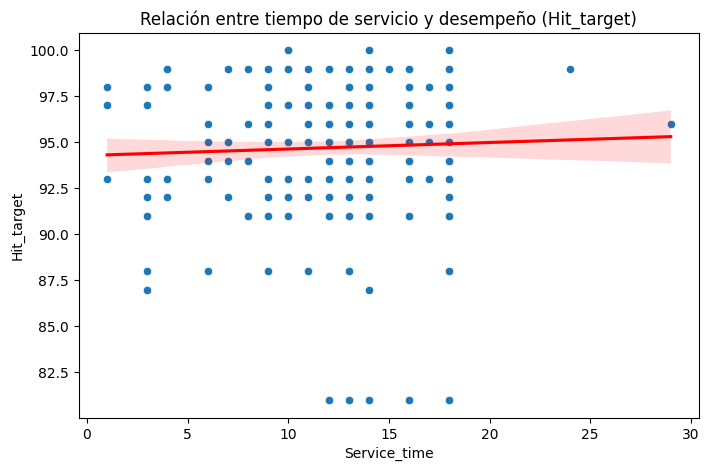

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Service_time', y='Hit_target', data=desempenyo)
sns.regplot(x='Service_time', y='Hit_target', data=desempenyo, scatter=False, color='red')
plt.title('Relación entre tiempo de servicio y desempeño (Hit_target)')
plt.show()

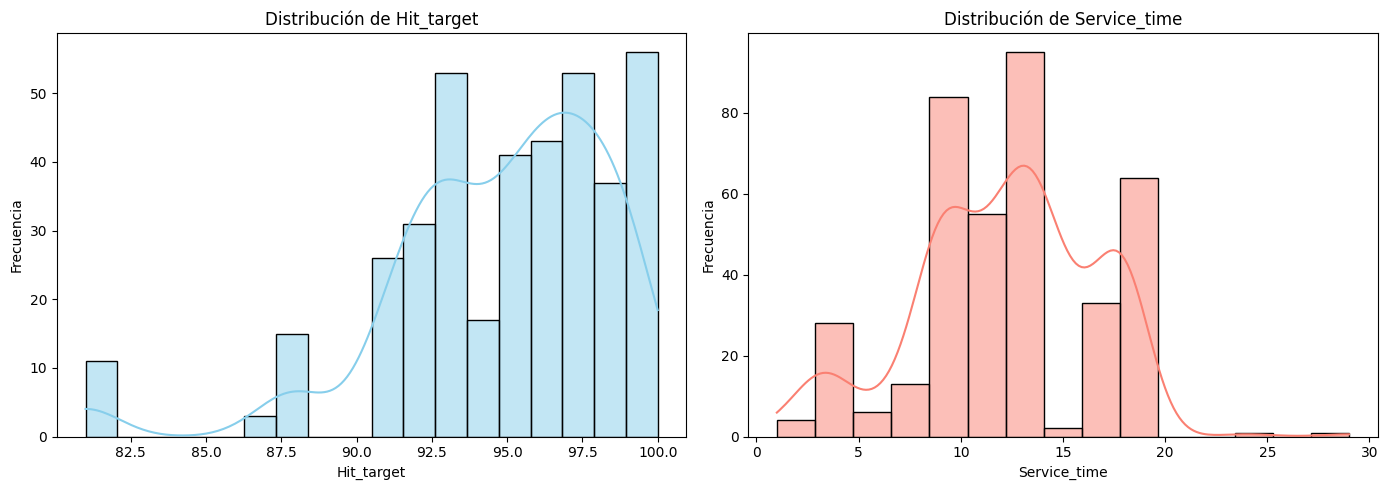

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Hit_target
sns.histplot(data=desempenyo, x='Hit_target', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de Hit_target')
axes[0].set_xlabel('Hit_target')
axes[0].set_ylabel('Frecuencia')

# Histograma de Service_time
sns.histplot(data=desempenyo, x='Service_time', kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribución de Service_time')
axes[1].set_xlabel('Service_time')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
shapiro_hit = shapiro(desempenyo['Hit_target'])
shapiro_dist = shapiro(desempenyo['Service_time'])

print(f'Hit_target → Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Service_time → Shapiro p-value = {shapiro_dist.pvalue:.4f}')


Hit_target → Shapiro p-value = 0.0000
Service_time → Shapiro p-value = 0.0000


La distribución de los datos NO es normal

In [ ]:
rho, pval = spearmanr(desempenyo['Hit_target'], desempenyo['Service_time'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")

Spearman rho = 0.0893, p-value = 0.0797


### el tiempo de servicio de los empleados no es estadisticamente significativo en su desempeño

## Distribucion de Hit_target por Work_load_Average_day (2 variables numericas - entero y float) 

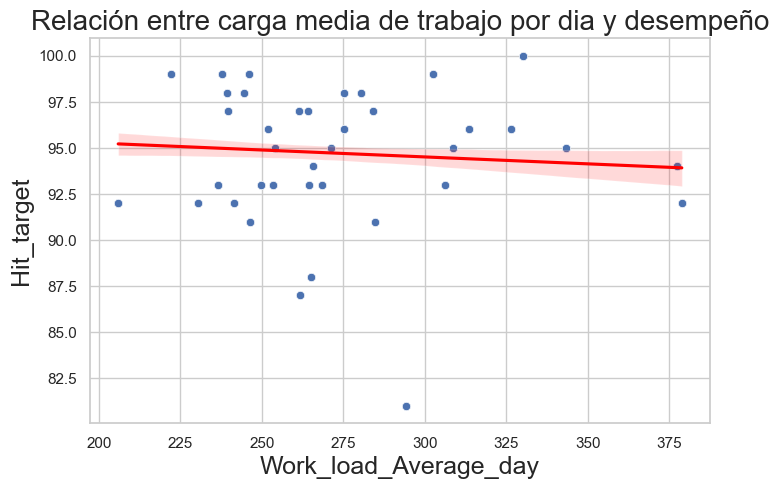

In [54]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Work_load_Average_day', y='Hit_target', data=desempenyo)
sns.regplot(x='Work_load_Average_day', y='Hit_target', data=desempenyo, scatter=False, color='red')
plt.title('Relación entre carga media de trabajo por dia y desempeño', fontsize=20)
plt.xlabel('Work_load_Average_day', fontsize=18)
plt.ylabel('Hit_target', fontsize=18)
plt.show()

Tendencia: La línea de regresión es ligeramente descendente, lo que indica una débil relación negativa entre la carga laboral diaria y el desempeño.

Densidad de puntos: Hay mucha dispersión; no hay una clara estructura lineal.

Relación: No parece haber una relación fuerte, aunque mayor carga diaria podría asociarse con leve disminución del desempeño.

<bound method Axes.set of <Axes: title={'center': 'Distribución de Work_load_Average_day'}, xlabel='Work_load_Average_day', ylabel='Count'>>

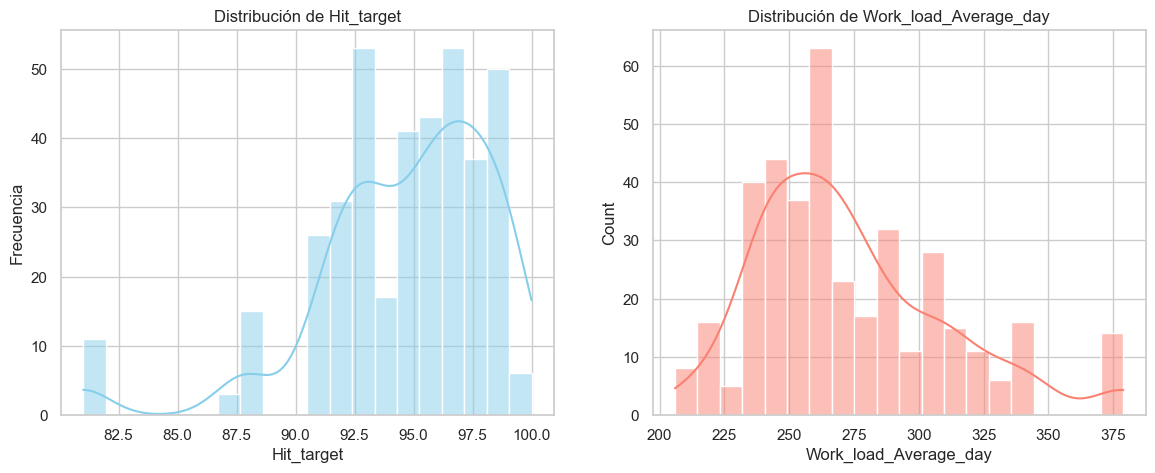

In [ ]:
# Ajustar estilo gráfico
sns.set(style="whitegrid")

# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Hit_target
sns.histplot(desempenyo['Hit_target'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Hit_target')
axes[0].set_xlabel('Hit_target')
axes[0].set_ylabel('Frecuencia')

# Histograma de Work_load_Average_day
sns.histplot(desempenyo['Work_load_Average_day'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribución de Work_load_Average_day')
axes[1].set_xlabel('Work_load_Average_day')
axes[1].set


 Análisis visual de la distribución
🔹 Hit_target:
La distribución no parece normal: presenta asimetría negativa (cola hacia la izquierda) y posibles picos múltiples.

Esto sugiere que no deberías usar pruebas paramétricas (como la correlación de Pearson o regresión lineal sin transformaciones o validaciones previas).

🔹 Work_load_Average_day:
Claramente asimétrica hacia la derecha (cola larga hacia valores altos).

Esto también viola el supuesto de normalidad.

In [ ]:
shapiro_hit = shapiro(desempenyo['Hit_target'])
shapiro_dist = shapiro(desempenyo['Service_time'])

print(f'Hit_target → Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Work_load_Average_day → Shapiro p-value = {shapiro_dist.pvalue:.4f}')

Hit_target → Shapiro p-value = 0.0000
Work_load_Average_day → Shapiro p-value = 0.0000


In [ ]:
rho, pval = spearmanr(desempenyo['Hit_target'], desempenyo['Work_load_Average_day'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")

Spearman rho = -0.1256, p-value = 0.0136


### La carga media de trabajo por dia de los empleados SI es estadisticamente significativa en su desempeño

 Resultado del test de Spearman:
ρ (rho) = -0.1256 → Relación negativa débil entre Work_load_Average_day y Hit_target.

p-value = 0.0136 → Significativo estadísticamente (p < 0.05).

Conclusión:
A mayor carga laboral diaria, el desempeño (Hit_target) tiende a ser ligeramente menor. Aunque la correlación es débil, es significativa, lo que sugiere que la carga de trabajo influye, aunque moderadamente, en el rendimiento.

## Regresión Lineal

In [26]:
# Modelado y evaluación
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Análisis estadístico detallado
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionamos las variables de interés
X = desempenyo[['Distance_Residence_Work', 'Service_time', 'Work_load_Average_day']]
y = desempenyo['Hit_target']

# Añadimos constante para el modelo (intercepto)
X = sm.add_constant(X)

# Ajustamos el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Mostramos resumen de resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             Hit_target   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.105
Date:                Sat, 05 Jul 2025   Prob (F-statistic):             0.0991
Time:                        17:12:15   Log-Likelihood:                -1057.7
No. Observations:                 386   AIC:                             2123.
Df Residuals:                     382   BIC:                             2139.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Perfil sociodemográfico

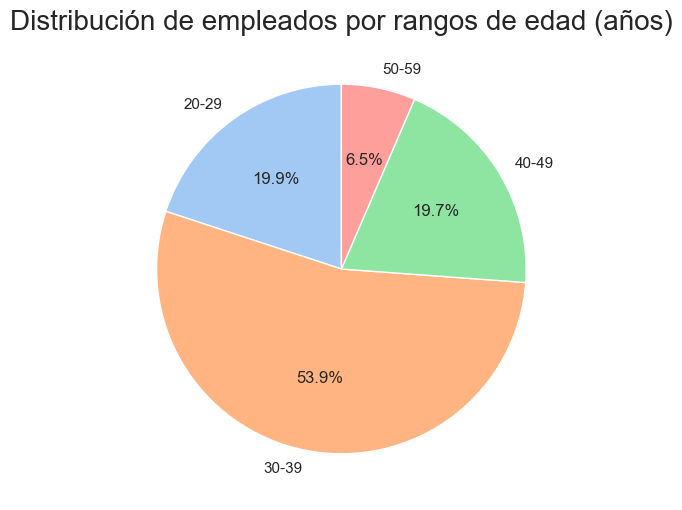

In [55]:
age_bins = [20, 30, 40, 50, 60] 
age_labels = ['20-29', '30-39', '40-49', '50-59']
desempenyo['Age_group'] = pd.cut(desempenyo['Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = desempenyo['Age_group'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(
    age_counts,
    labels=age_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:len(age_labels)]
)
plt.title("Distribución de empleados por rangos de edad (años)", fontsize=20)
plt.show()

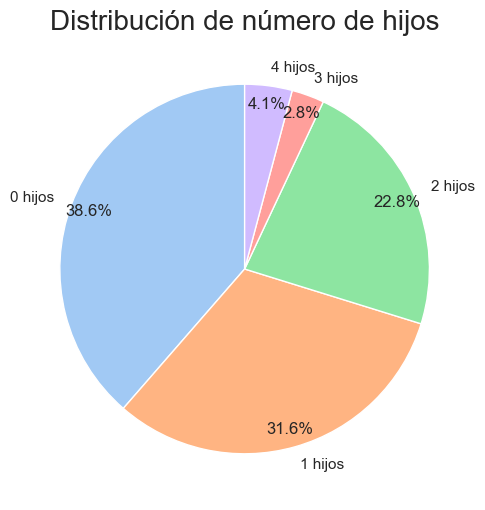

In [56]:
son_counts = desempenyo['Son'].value_counts().sort_index()
labels = [f'{i} hijos' for i in son_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(
    son_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:len(son_counts)],
    labeldistance=1.1,    # Aleja las etiquetas
    pctdistance=0.9      # Aleja los porcentajes del centro
)
plt.title("Distribución de número de hijos", fontsize=20)
plt.show()

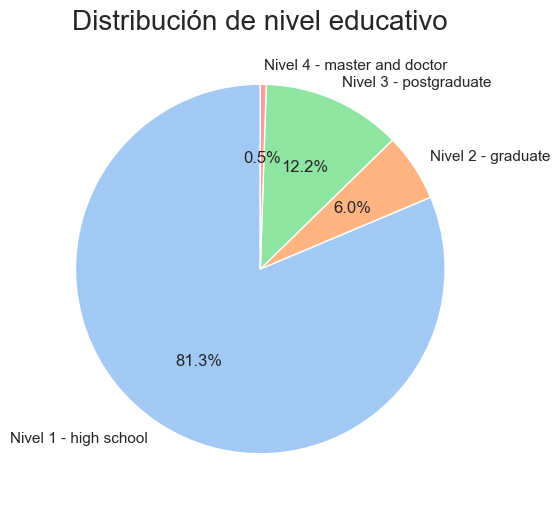

In [57]:
education_counts = desempenyo['Education'].value_counts().sort_index()
labels = ['Nivel 1 - high school', 'Nivel 2 - graduate', 'Nivel 3 - postgraduate','Nivel 4 - master and doctor']  # Ajusta los nombres si tienes descripciones

plt.figure(figsize=(6, 6))
plt.pie(
    education_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:4]
)
plt.title("Distribución de nivel educativo", fontsize=20)
plt.show()